# Frequently Used Words - conclusion

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import pandas as pd
import string
import re

In [2]:
d_conclusion=pd.read_csv('Insight_dataset.csv',index_col=0)
d_conclusion

,corpusid,paper-title,section-title,Target,Content,ref_paper_id,pdfurl,Solved,Unsolved/FW
0,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,limitation and discussion,Insight-tree,tasks beyond image generation. idea2img explor...,{},https://export.arxiv.org/pdf/2310.08541v1.pdf,NaN,NaN
1,263908862,Idea2Img: Iterative Self-Refinement with GPT-4...,conclusion,Insight-tree,"we have presented idea2img, a multimodal itera...",{},https://export.arxiv.org/pdf/2310.08541v1.pdf,NaN,NaN
2,248665596,From Distillation to Hard Negative Sampling: M...,conclusion,Insight-tree,"in this paper, we have built on the splade mod...",{220302524: '[30]'},https://arxiv.org/pdf/2205.04733v2.pdf,NaN,NaN
3,264490922,What Else Do I Need to Know? The Effect of Bac...,discussion and conclusion,Insight-tree,"large general-purpose language models, such as...","{123758373: 'Chen and Durrett, 2019;', 2466523...",https://export.arxiv.org/pdf/2305.14331v2.pdf,NaN,NaN
4,253098647,Learning to Perform Complex Tasks through Comp...,conclusion & future work,Insight-tree,"in this work, we proposed cft as an improvemen...","{204915921: 'Khot et al., 2020;', 248666080: '...",https://export.arxiv.org/pdf/2210.12607v1.pdf,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1103,252819325,CMQA: A Dataset of Conditional Question Answer...,conclusion,Insight-tree,"in this paper, we propose a new challenge: con...","{215785913: 'Chen et al., 2020', 67855846: 'Du...",https://www.aclanthology.org/2022.coling-1.146...,NaN,NaN
1104,249049412,Examining Single Sentence Label Leakage in Nat...,conclusion,Insight-tree,"in the four years since (poliak et al., 2018) ...",{},https://arxiv.org/pdf/2112.09237v3.pdf,NaN,NaN
1105,236459873,Explanations for CommonsenseQA: New Dataset an...,conclusion and future work,Insight-tree,we have presented desiderata of what constitut...,"{218487313: 'Yadav et al., 2020', 52822214: 'Y...",https://aclanthology.org/2021.acl-long.238.pdf,NaN,NaN
1106,202565945,Self-Assembling Modular Networks for Interpret...,conclusion,Insight-tree,"in this work, we proposed a self-assembling ne...","{139103297: 'Chen and Durrett, 2019;', 1899278...",https://www.aclweb.org/anthology/D19-1455.pdf,NaN,NaN


In [3]:
strings_total=''
for i in range(len(d_conclusion)):
    a=d_conclusion['Content'][i]
    strings_total=strings_total+' '+a

In [4]:
def Tokenizer(strings):
    #lower & clean punctuation
    strings=strings.lower()
    strings=strings.translate(str.maketrans('', '', string.punctuation))

    #Stopwords
    token=nltk.word_tokenize(strings)
    stop_words = stopwords.words('english')
    tokens=[]
    for i in range(len(token)):
        if token[i] not in stop_words:
            tokens.append(token[i])  

    #clean tokens
    lemmatizer = WordNetLemmatizer()
    filter_word=['introduction','conclusion','evaluation','figure','table','survey','et','al','research','we','use','work','issue','also','future','however','finally','task','paper','nlp','natural','language','processing','international','conference','meeting','annual','method','example','arxiv']
    clean_token=[]
    for item in tokens:
        item=lemmatizer.lemmatize(item, pos="n")
        if item not in filter_word and re.search(r'^\d+$',item) is None:
            clean_token.append(item)
    
    return clean_token


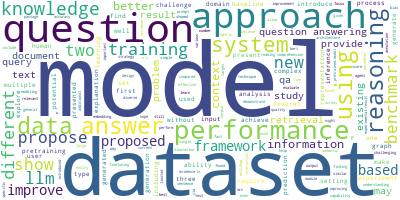

In [5]:
clean_token=Tokenizer(strings_total)
#wordcloud
long_string = ','.join(clean_token)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [6]:
freq_dist = nltk.FreqDist(clean_token)
freq_dist.most_common(1000)

[('model', 1840),
 ('question', 981),
 ('reasoning', 686),
 ('performance', 573),
 ('qa', 473),
 ('approach', 432),
 ('data', 431),
 ('dataset', 415),
 ('knowledge', 413),
 ('answer', 407),
 ('result', 402),
 ('show', 392),
 ('datasets', 391),
 ('system', 383),
 ('retrieval', 381),
 ('training', 344),
 ('proposed', 302),
 ('different', 301),
 ('benchmark', 285),
 ('new', 284),
 ('experiment', 283),
 ('learning', 280),
 ('using', 277),
 ('propose', 274),
 ('information', 254),
 ('multihop', 248),
 ('two', 237),
 ('document', 232),
 ('answering', 231),
 ('better', 222),
 ('llm', 221),
 ('large', 214),
 ('study', 213),
 ('context', 213),
 ('framework', 211),
 ('human', 204),
 ('generation', 197),
 ('baseline', 195),
 ('based', 195),
 ('text', 194),
 ('graph', 192),
 ('stateoftheart', 185),
 ('set', 185),
 ('query', 184),
 ('improve', 182),
 ('existing', 181),
 ('domain', 180),
 ('may', 179),
 ('present', 177),
 ('analysis', 175),
 ('problem', 175),
 ('novel', 174),
 ('first', 169),
 ('com